**Seungjae Lee and Michael Yu**

Fall 2019

CS343: Neural Networks

Project 3: Convolutional Neural Networks

In [5]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=7)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

**Global note: Make sure any debug printouts do not appear if `verbose=False`!**

## Task 4) Implement weight optimizers for gradient descent

To change the weights during training, we need an optimization algorithm to have our loss decrease over epochs as we learn the structure of the input patterns. Until now, we used **Stochastic gradient descent (SGD)**, which is the simplest algorithm. We will implement 3 popular algorithms:

- `SGD` (stochastic gradient descent)
- `SGD_Momentum` (stochastic gradient descent with momentum)
- `Adam` (Adaptive Moment Estimation)

Implement each of these according to the update equations (in `optimizer.py::update_weights` in each subclass). Let's use $w_t$ in the math below to represent the weights in a layer at time step $t$, $dw$ to represent the gradient of the weights in a layer, and $\eta$ represent the learning rate. We use vectorized notation below (update applies to all weights element-wise). Then:

**SGD**: 

$w_{t} = w_{t-1} - \eta \times dw$

**SGD (momentum)**:

$v_{t} = m \times v_{t-1} - \eta \times dw$

$w_{t} = w_{t-1} + v_t$

where $v_t$ is called the `velocity` at time $t$. At the first time step (0), velocity should be set to all zeros and have the same shape as $w$. $m$ is a constant that determines how much of the gradient obtained on the previous time step should factor into the weight update for the current time step.


**Adam**:

$m_{t} = \beta_1 \times m_{t-1} + (1 - \beta_1)\times dw$

$v_{t} = \beta_2 \times v_{t-1} + (1 - \beta_2)\times dw^2$

$n = m_{t} / \left (1-(\beta_1^t) \right )$

$u = v_{t} / \left (1-(\beta_2^t) \right )$

$w_{t} = w_{t-1} - \left ( \eta \times n \right ) / \left ( \sqrt(u) + \epsilon \right ) $


Like SGD (momentum), Adam records momentum terms $m$ and $v$. At time step 0, you should initialize them to zeros in an array equal in size to the weights. $n$ and $u$ are variables computed on each time step. The remaining quantities are constants. Note that $t$ keeps track of the integer time step, and needs to be incremented on each update. 

In [6]:
from optimizer import *

####  Test SGD

In [3]:
np.random.seed(0)

wts = np.arange(-3, 3, dtype=np.float64)
d_wts = np.random.randn(len(wts))

optimizer = SGD()
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()

print(f'SGD: Wts after 1 iter {new_wts_1}')
print(f'SGD: Wts after 2 iter {new_wts_2}')

SGD: Wts after 1 iter [-3.1764052 -2.0400157 -1.0978738 -0.2240893  0.8132442  2.0977278]
SGD: Wts after 2 iter [-3.3528105 -2.0800314 -1.1957476 -0.4481786  0.6264884  2.1954556]


Output should be:

    SGD: Wts after 1 iter [-3.1764052 -2.0400157 -1.0978738 -0.2240893  0.8132442  2.0977278]
    SGD: Wts after 2 iter [-3.3528105 -2.0800314 -1.1957476 -0.4481786  0.6264884  2.1954556]

####  Test SGD_Momentum

In [4]:
np.random.seed(0)

wts = np.random.randn(3, 4)
d_wts = np.random.randn(3, 4)

optimizer = SGD_Momentum(lr=0.1, m=0.6)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()

print(f'SGD M: Wts after 1 iter\n{new_wts_1}')
print(f'SGD M: Wts after 2 iter\n{new_wts_2}')

SGD M: Wts after 1 iter
[[ 1.6879486  0.3879897  0.9343517  2.2075258]
 [ 1.7181501 -0.9567621  0.9187816 -0.0659476]
 [ 0.1520801  0.3452366  0.0576     1.52849  ]]
SGD M: Wts after 2 iter
[[ 1.5661825  0.3685217  0.8633335  2.1541379]
 [ 1.4790974 -0.9239367  0.8686908  0.0707077]
 [ 0.5605585  0.2406577 -0.0807098  1.6472364]]


Output should be:

    SGD M: Wts after 1 iter
    [[ 1.6879486  0.3879897  0.9343517  2.2075258]
     [ 1.7181501 -0.9567621  0.9187816 -0.0659476]
     [ 0.1520801  0.3452366  0.0576     1.52849  ]]
    SGD M: Wts after 2 iter
    [[ 1.5661825  0.3685217  0.8633335  2.1541379]
     [ 1.4790974 -0.9239367  0.8686908  0.0707077]
     [ 0.5605585  0.2406577 -0.0807098  1.6472364]]

####  Test Adam

In [5]:
np.random.seed(0)

wts = np.random.randn(3, 4)
d_wts = np.random.randn(3, 4)

optimizer = Adam(lr=0.1)
optimizer.prepare(wts, d_wts)

new_wts_1 = optimizer.update_weights()
new_wts_2 = optimizer.update_weights()
new_wts_3 = optimizer.update_weights()

print(f'Adam: Wts after 1 iter\n{new_wts_1}')
print(f'Adam: Wts after 2 iter\n{new_wts_2}')
print(f'Adam: Wts after 3 iter\n{new_wts_3}')

Adam: Wts after 1 iter
[[ 1.6640523  0.3001572  0.878738   2.1408932]
 [ 1.767558  -0.8772779  0.8500884 -0.0513572]
 [-0.0032189  0.3105985  0.0440436  1.5542735]]
Adam: Wts after 2 iter
[[ 1.5640523  0.2001572  0.778738   2.0408932]
 [ 1.667558  -0.7772779  0.7500884  0.0486428]
 [ 0.0967811  0.2105985 -0.0559564  1.6542735]]
Adam: Wts after 3 iter
[[ 1.4640523  0.1001572  0.678738   1.9408932]
 [ 1.567558  -0.6772779  0.6500884  0.1486428]
 [ 0.1967811  0.1105985 -0.1559564  1.7542735]]


Output should be:

    Adam: Wts after 1 iter
    [[ 1.6640523  0.3001572  0.878738   2.1408932]
     [ 1.767558  -0.8772779  0.8500884 -0.0513572]
     [-0.0032189  0.3105985  0.0440436  1.5542735]]
    Adam: Wts after 2 iter
    [[ 1.5640523  0.2001572  0.778738   2.0408932]
     [ 1.667558  -0.7772779  0.7500884  0.0486428]
     [ 0.0967811  0.2105985 -0.0559564  1.6542735]]
    Adam: Wts after 3 iter
    [[ 1.4640523  0.1001572  0.678738   1.9408932]
     [ 1.567558  -0.6772779  0.6500884  0.1486428]
     [ 0.1967811  0.1105985 -0.1559564  1.7542735]]  

## Task 5) Write network training methods

Implement methods in `network.py` to actually train the network, using all the building blocks that you have created. The methods to implement are:

- `predict`
- `fit`. Add an optional parameter `print_every=1` that controls the frequency (in iterations) with which to wait before printing out the loss and iteration number.

## Task 6) Overfitting a convolutional neural network

Usually we try to prevent overfitting, but we can use it as a valuable debugging tool to test out a complex backprop-style neural network. Assuming everything is working, it is almost always the case that we should be able to overfit a tiny dataset with a huge model with tons of parameters (i.e. your CNN). You will use this strategy to verify that your network is working.

Let's use a small amount of real data from STL-10. If everything is working properly, the network should overfit and you should see a significant drop in the loss from its starting value of ~2.3.

### 6a) Move your `preprocess_data.py` from the MLP project

Make the one following change:

- Re-arrange dimensions of `imgs` so that when it is returned, `shape=(Num imgs, RGB color chans, height, width)` (No longer flatten non-batch dimensions)

In [7]:
import load_stl10_dataset
import preprocess_data
from network import ConvNet4
import optimizer

### 6b) Load in STL-10 at 16x16 resolution

If you don't want to wait for STL-10 to download from the internet and resize, copy over your data and numpy folders from your MLP project.

**Notes:**
- You will need to download the new version of `load_stl10_dataset`.
- The different train/test split here won't work if you hard coded the proportions in your `create_splits` implementation! *This isn't catastrophic, it just means that it will take longer to compute accuracy on the validation set.*

In [24]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 16x16
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
stl_imgs, stl_labels = load_stl10_dataset.load(scale_fact=6)
# preprocess
stl_imgs, stl_labels = preprocess_data.preprocess_stl(stl_imgs, stl_labels)
# create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.create_splits(
    stl_imgs, stl_labels, n_train_samps=4548, n_test_samps=400, n_valid_samps=2, n_dev_samps=50)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

classes = np.loadtxt(os.path.join('data', 'stl10_binary', 'class_names.txt'), dtype=str)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 16x16...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
Train data shape:  (4548, 3, 16, 16)
Train labels shape:  (4548,)
Test data shape:  (400, 3, 16, 16)
Test labels shape:  (400,)
Validation data shape:  (2, 3, 16, 16)
Validation labels shape:  (2,)
dev data shape:  (50, 3, 16, 16)
dev labels shape:  (50,)


### 6c) Train and overfit the network on a small STL-10 sample with each optimizer

**Goal:** If your network works, you should see a drop in loss over epochs to 0.

In 3 seperate cells below

- Create 3 different `ConvNet4` networks.
- Compile each with a different optimizer (each net uses a different optimizer).
- Train each on the **dev** set and validate on the tiny validation set (we dont care about out-of-training-set performance here).

You will be making plots demonstrating the overfitting for each optimizer below. **You should train the nets with the same number of epochs such that at least 2/3 of them clearly show loss convergence to a small value; one optimizer may not converge yet, and that's ok**. Cut off the simulations based on the 2/3 that do converge.

Guidelines:

- Weight scales and learning rates of `1e-2` should work well.
- Start by testing the Adam optimizer.
- Remember that the input shape is (3, 16, 16). You need to specify this to the network constructor.
- The hyperparameters are up to you, though I wouldn't recommend a batch size that is too small (close to 1), otherwise it may be tricky to see whether the loss is actually decreasing on average.
- Decreasing `acc_freq` will make the `fit` function evaluate the training and validation accuracy more often. This is a computationally intensive process, so small values come with an increase in training time. On the other hand, checking the accuracy too infrequently means you won't know whether the network is trending toward overfitting the training data, which is what you're checking for.
- Each training session takes ~30 mins on my laptop.

**Caveat emptor:** Training convolutional networks is notoriously computationally intensive. If you experiment with hyperparameters, each training session may take several hours. Use the loss/accuracy print outs to quickly gauge whether your hyperparameter choices are getting your network to decrease in loss. Monitor print outs and interrupt the Jupyter kernel if things are not trending in the right direction. Consider using the Davis 102 iMacs if this is running too slow on your laptop.

In [25]:
#Adam
adam_loss = None
adam_train_acc = None
adam_val_acc = None
net1 = ConvNet4(input_shape=(3, 16,16), wt_scale = 0.01)
net1.compile('adam', lr = 0.01)
adam_loss, adam_train_acc, adam_val_acc = net1.fit(x_dev, y_dev,x_val, y_val,mini_batch_sz=50, n_epochs=50, acc_freq=10)

Starting to train...
50 iterations. 1 iter/epoch.
Image shape should be and is: (50, 3, 22, 22) (50, 3, 22, 22)
batch_sz=50, n_chan=3, img_x=16, img_y=16
n_kers=32, n_ker_chans=3, ker_x=7, ker_y=7
pad_x=3, pad_y=3
Padded shape is (50, 3, 22, 22)
Time taken for iteration 0:  0.16483778953552247
Image shape should be and is: (50, 3, 22, 22) (50, 3, 22, 22)
batch_sz=50, n_chan=3, img_x=16, img_y=16
n_kers=32, n_ker_chans=3, ker_x=7, ker_y=7
pad_x=3, pad_y=3
Padded shape is (50, 3, 22, 22)
Image shape should be and is: (50, 3, 22, 22) (50, 3, 22, 22)
batch_sz=50, n_chan=3, img_x=16, img_y=16
n_kers=32, n_ker_chans=3, ker_x=7, ker_y=7
pad_x=3, pad_y=3
Padded shape is (50, 3, 22, 22)
Image shape should be and is: (50, 3, 22, 22) (50, 3, 22, 22)
batch_sz=50, n_chan=3, img_x=16, img_y=16
n_kers=32, n_ker_chans=3, ker_x=7, ker_y=7
pad_x=3, pad_y=3
Padded shape is (50, 3, 22, 22)
Image shape should be and is: (50, 3, 22, 22) (50, 3, 22, 22)
batch_sz=50, n_chan=3, img_x=16, img_y=16
n_kers=32, n_

KeyboardInterrupt: 

In [ ]:
# SGD-M
sgd_m_loss = None
sgd_m_train_acc = None
sgd_m_val_acc = None 
net2 = ConvNet4(input_shape = (3,16,16), wt_scale = 0.01)
net2.compile('sgd_momentum', lr = 0.01)
sgd_m_loss, sgd_m_train_acc, sgd_m_val_acc = net2.fit(x_dev, y_dev,x_val, y_val,mini_batch_sz=100, n_epochs=50, acc_freq=4)

In [ ]:
# SGD

sgd_loss = None
sgd_train_acc = None
sgd_val_acc = None 
net3 = ConvNet4(input_shape = (3,16,16), wt_scale = 0.01)
net3.compile('sgd', lr = 0.01)
sgd_loss, sgd_train_acc, sgd_val_acc = net3.fit(x_dev, y_dev,x_val, y_val,mini_batch_sz=100, n_epochs=50, acc_freq=3)

**Question 3**: Why does decreasing the mini-batch size make the loss print-outs more erratic?

### 6d) Evaluate the different optimizers

Make 2 "high quality" plots showing the following

- Plot the accuracy (y axis) for the three optimizers as a function of training epoch (x axis).
- Plot the loss (y axis) for the three optimizers as a function of training iteration (x axis).

A high quality plot consists of:
- A useful title
- X and Y axis labels
- A legend

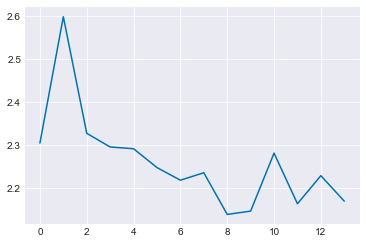

In [28]:
# old_adam_loss = adam_loss
# old_adam_train_acc = adam_train_acc
# # old_adam_val_acc = adam_val_acc
plt.plot(net1.loss_history)
# plt.plot(adam_train_acc)
# print(adam_train_acc)
# print(adam_val_acc)

**Question 4**: Which optimizer works best and why do think it is best?

**Question 5**: What is happening with the training set accuracy and why?

## Task 7: Training convolutional neural network on STL-10

### 7a) Load in STL-10 at 32x32 resolution

In [8]:
# Download the STL-10 dataset from the internet, convert it to Numpy ndarray, resize to 32x32
# cache it locally on your computer for faster loading next time.
load_stl10_dataset.purge_cached_dataset()
stl_imgs, stl_labels = load_stl10_dataset.load(scale_fact=3)
# preprocess
stl_imgs, stl_labels = preprocess_data.preprocess_stl(stl_imgs, stl_labels)
# create splits
x_train, y_train, x_test, y_test, x_val, y_val, x_dev, y_dev = preprocess_data.create_splits(
    stl_imgs, stl_labels, n_train_samps=4548, n_test_samps=400, n_valid_samps=2, n_dev_samps=50)

print ('Train data shape: ', x_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Validation data shape: ', x_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('dev data shape: ', x_dev.shape)
print ('dev labels shape: ', y_dev.shape)

classes = np.loadtxt(os.path.join('data', 'stl10_binary', 'class_names.txt'), dtype=str)

Images are: (5000, 96, 96, 3)
Labels are: (5000,)
Resizing 5000 images to 32x32...Done!
Saving Numpy arrays the images and labels to ./numpy...Done!
Train data shape:  (4548, 3, 32, 32)
Train labels shape:  (4548,)
Test data shape:  (400, 3, 32, 32)
Test labels shape:  (400,)
Validation data shape:  (2, 3, 32, 32)
Validation labels shape:  (2,)
dev data shape:  (50, 3, 32, 32)
dev labels shape:  (50,)


### 7b) Set up accelerated convolution and max pooling layers

As you may have noticed, we had to downsize STL-10 to 16x16 resolution to train the network on the dev set (N=50) in a reasonable amount of time. The training set is N=4000, how will we ever manage to process that amount of data!?

On one hand, this is an unfortunate inevitable reality of working with large ("big") datasets: you can easily find a dataset that is too time consuming to process for any computer, despite how fast/many CPU/GPUs it has.

On the other hand, we can do better for this project and STL-10 :) If you were to time (profile) different parts of the training process, you'd notice that largest bottleneck is convolution and max pooling operations (both forward/backward). You implemented those operations intuitively, which does not always yield the best performance. **By swapping out forward/backward convolution and maxpooling for implementations that use different algorithms (im2col, reshaping) that are compiled to C code, we will speed up training up by several orders of magnitude**.

Follow these steps to subsitute in the "accelerated" convolution and max pooling layers.

- Install the `cython` python package: `pip3 install cython` (or `pip3 install cython --user` if working in Davis 102)
- Dowload files `im2col_cython.pyx`, `accelerated_layer.py`, `setup.py` from the project website. Put them in your base project folder.
- Open terminal, `cd` to Project directory.
- Compile the im2col functions: `python3 setup.py build_ext --inplace`. A `.c` and `.so` file should have appeared in your project folder.
- Restart Jupyter Notebook kernel
- Create a class called `Conv4NetAccel` in `network.py` by copy-pasting the contents of `Conv4Net`. Import `accelerated_layer` at the top and replace the `Conv2D` and `MaxPool2D` layers with `Conv2DAccel` and `MaxPool2DAccel`.

### 7c) Training convolutional neural network on STL-10

You are now ready to train on the entire training set.

- Create a `Conv4NetAccel` object with hyperparameters of your choice.
- Your goal is to achieve 45% accuracy on the test and/or validation set.

Notes:

- I suggest using your intuition about hyperparameters and over/underfitting to guide your choice, rather than a grid search. This should not be overly challenging.
- Use the best / most efficient optimizer based on your prior analysis.
- It should take on the order of 1 sec per training iteration. If that's way off, seek help as something could be wrong with running the acclerated code.

In [2]:
from network import ConvNet4Accel

In [ ]:
an_loss = None
an_train_acc = None
an_val_acc = None

accel_net1 = ConvNet4Accel(input_shape = (3,32,32), wt_scale = 0.001, reg = 0.001)
accel_net1.compile('adam', lr = 0.01)

an_loss, an_train_acc, an_val_acc = accel_net1.fit(x_train, y_train,x_val, y_val,mini_batch_sz=10, n_epochs=50, acc_freq=50)

Starting to train...
22700 iterations. 454 iter/epoch.
Time taken for iteration 0:  0.0017168283462524413
  Train acc: 0.116, Val acc: 0.5
  Train acc: 0.088, Val acc: 0.5
  Train acc: 0.104, Val acc: 0.5
  Train acc: 0.09, Val acc: 0.5
  Train acc: 0.084, Val acc: 0.5
  Train acc: 0.094, Val acc: 0.5
  Train acc: 0.096, Val acc: 0.0
  Train acc: 0.126, Val acc: 0.0
  Train acc: 0.084, Val acc: 0.0
  Train acc: 0.116, Val acc: 0.0
  Train acc: 0.09, Val acc: 0.5
  Train acc: 0.102, Val acc: 0.5
  Train acc: 0.074, Val acc: 0.0
  Train acc: 0.08, Val acc: 0.5
  Train acc: 0.114, Val acc: 0.5
  Train acc: 0.08, Val acc: 0.5
  Train acc: 0.07, Val acc: 0.0
  Train acc: 0.094, Val acc: 0.0
  Train acc: 0.096, Val acc: 0.5
  Train acc: 0.092, Val acc: 0.5
  Train acc: 0.096, Val acc: 0.0
  Train acc: 0.108, Val acc: 0.0
  Train acc: 0.09, Val acc: 0.5


In [16]:
an_loss2 = None
an_train_acc2 = None
an_val_acc2 = None

accel_net2 = ConvNet4Accel(input_shape = (3,32,32), wt_scale = 0.001, reg = 0.001)
accel_net2.compile('adam', lr = .007)

an_loss2, an_train_acc2, an_val_acc2 = accel_net2.fit(x_train, y_train,x_val, y_val,mini_batch_sz=10, n_epochs=45, acc_freq=4)

Starting to train...
20430 iterations. 454 iter/epoch.
Time taken for iteration 0:  0.0020338853200276693
  Train acc: 0.142, Val acc: 0.0
  Train acc: 0.092, Val acc: 0.0
  Train acc: 0.108, Val acc: 0.0
  Train acc: 0.104, Val acc: 0.0
  Train acc: 0.094, Val acc: 0.0
  Train acc: 0.132, Val acc: 0.0
  Train acc: 0.152, Val acc: 0.0
  Train acc: 0.146, Val acc: 0.0
  Train acc: 0.15, Val acc: 0.0
  Train acc: 0.178, Val acc: 0.0
  Train acc: 0.166, Val acc: 0.0
  Train acc: 0.144, Val acc: 0.0
  Train acc: 0.17, Val acc: 0.0
  Train acc: 0.2, Val acc: 0.0
  Train acc: 0.156, Val acc: 0.0
  Train acc: 0.182, Val acc: 0.0
  Train acc: 0.226, Val acc: 0.0
  Train acc: 0.208, Val acc: 0.0
  Train acc: 0.186, Val acc: 0.0
  Train acc: 0.224, Val acc: 0.0


KeyboardInterrupt: 

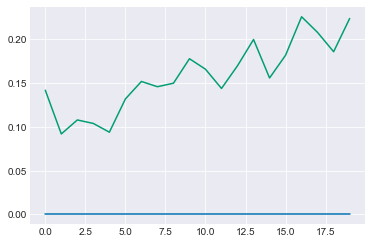

In [17]:

plt.plot(accel_net2.validation_acc_history)
plt.plot(accel_net2.train_acc_history)
plt.show()
 

In [13]:
accel_net2.accuracy(x_test, y_test, mini_batch_sz = 100)


0.0875

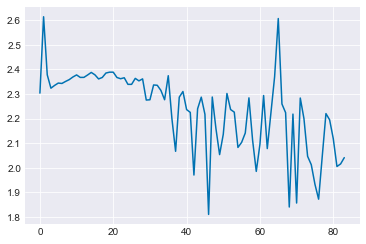

In [18]:
plt.plot(accel_net2.loss_history)
plt.show()

In [19]:
plot_weights(accel_net2.layers[0].wts.transpose(0, 2, 3, 1), saveFig=False, filename='convWts_adam_train_20epoch.png')

NameError: name 'plot_weights' is not defined

In [52]:
accel_net3.accuracy(x_test, y_test, mini_batch_sz = 100)

0.4775

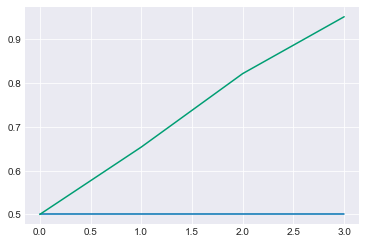

In [53]:
plt.plot(accel_net3.validation_acc_history)
plt.plot(accel_net3.train_acc_history)
plt.show()

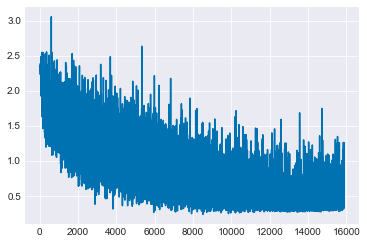

In [54]:
plt.plot(accel_net1.loss_history)
plt.show()

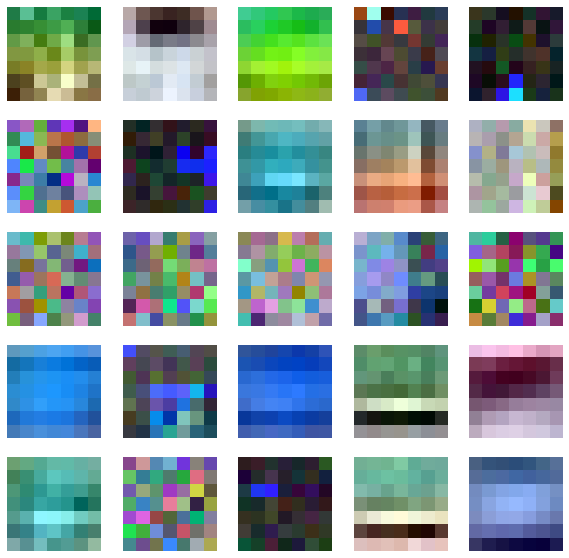

In [55]:
plot_weights(accel_net3.layers[0].wts.transpose(0, 2, 3, 1), saveFig=False, filename='convWts_adam_train_20epoch.png')

### 7d) Analysis of STL-10 training quality

Use your trained network that achieves 45%+ accuracy on the test set to make "high quality" plots showing the following 

- Plot the accuracy of the training and validation sets as a function of training epoch. You may have to convert iterations to epochs.
- Plot the loss as a function of training iteration.

In [42]:
accel_net1.accuracy(x_test, y_test, mini_batch_sz = 100)

0.4725

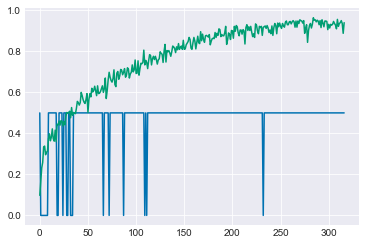

In [43]:
plt.plot(accel_net1.validation_acc_history)
plt.plot(accel_net1.train_acc_history)
plt.show()

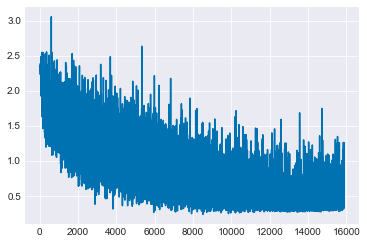

In [44]:
plt.plot(accel_net1.loss_history)
plt.show()

In [58]:
an_loss4 = None
an_train_acc4 = None
an_val_acc4 = None

accel_net4 = ConvNet4Accel(input_shape = (3,32,32), wt_scale = 0.001, reg = 0.0001)
accel_net4.compile('adam', lr = 0.001)

an_loss4, an_train_acc4, an_val_acc4 = accel_net4.fit(x_train, y_train,x_val, y_val,mini_batch_sz=100, n_epochs=75, acc_freq=100)

Starting to train...
3375 iterations. 45 iter/epoch.
Time taken for iteration 0:  0.007606796423594157
  Train acc: 0.288, Val acc: 0.0
  Train acc: 0.386, Val acc: 0.0
  Train acc: 0.466, Val acc: 0.0
  Train acc: 0.46, Val acc: 0.5
  Train acc: 0.538, Val acc: 0.5
  Train acc: 0.592, Val acc: 0.5
  Train acc: 0.574, Val acc: 0.5
  Train acc: 0.642, Val acc: 0.5
  Train acc: 0.612, Val acc: 0.5
  Train acc: 0.678, Val acc: 0.5
  Train acc: 0.686, Val acc: 0.5
  Train acc: 0.7, Val acc: 0.5
  Train acc: 0.746, Val acc: 0.5
  Train acc: 0.758, Val acc: 0.5
  Train acc: 0.814, Val acc: 0.5
  Train acc: 0.816, Val acc: 0.5
  Train acc: 0.852, Val acc: 0.5
  Train acc: 0.848, Val acc: 0.5
  Train acc: 0.888, Val acc: 0.5
  Train acc: 0.936, Val acc: 0.5
  Train acc: 0.946, Val acc: 0.5
  Train acc: 0.972, Val acc: 0.5
  Train acc: 0.972, Val acc: 0.5
  Train acc: 0.978, Val acc: 0.5
  Train acc: 0.978, Val acc: 0.5
  Train acc: 0.996, Val acc: 0.5
  Train acc: 0.984, Val acc: 0.5
  Train a

KeyboardInterrupt: 

In [60]:
accel_net4.accuracy(x_test, y_test, mini_batch_sz = 100)

0.4925

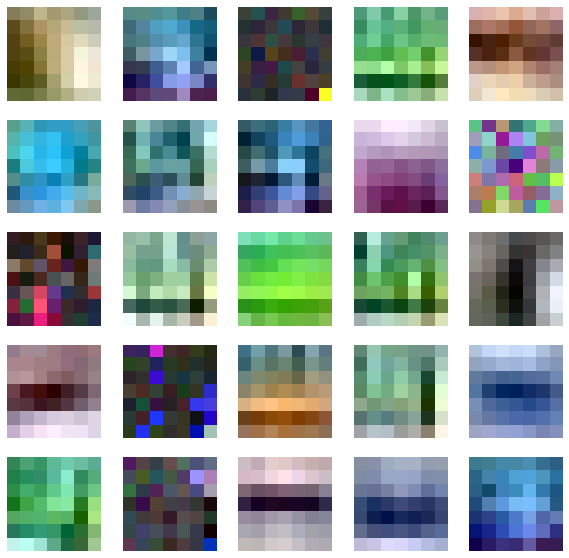

In [59]:
plot_weights(accel_net4.layers[0].wts.transpose(0, 2, 3, 1), saveFig=False, filename='convWts_adam_train_20epoch.png')

In [61]:
an_loss5 = None
an_train_acc5 = None
an_val_acc5 = None

accel_net5 = ConvNet4Accel(input_shape = (3,32,32), wt_scale = 0.001, reg = 0.0001)
accel_net5.compile('adam', lr = 0.0001)

an_loss5, an_train_acc5, an_val_acc5 = accel_net5.fit(x_train, y_train,x_val, y_val,mini_batch_sz=100, n_epochs=75, acc_freq=100)

Starting to train...
3375 iterations. 45 iter/epoch.
Time taken for iteration 0:  0.007364380359649658
  Train acc: 0.174, Val acc: 0.5
  Train acc: 0.256, Val acc: 0.5
  Train acc: 0.296, Val acc: 0.5
  Train acc: 0.294, Val acc: 0.5
  Train acc: 0.262, Val acc: 0.0
  Train acc: 0.32, Val acc: 0.0
  Train acc: 0.362, Val acc: 0.0
  Train acc: 0.336, Val acc: 0.0
  Train acc: 0.376, Val acc: 0.0
  Train acc: 0.388, Val acc: 0.0
  Train acc: 0.41, Val acc: 0.0
  Train acc: 0.396, Val acc: 0.0
  Train acc: 0.394, Val acc: 0.0
  Train acc: 0.404, Val acc: 0.0
  Train acc: 0.38, Val acc: 0.0
  Train acc: 0.422, Val acc: 0.0
  Train acc: 0.468, Val acc: 0.0
  Train acc: 0.416, Val acc: 0.0
  Train acc: 0.428, Val acc: 0.0
  Train acc: 0.488, Val acc: 0.0
  Train acc: 0.46, Val acc: 0.0
  Train acc: 0.442, Val acc: 0.0
  Train acc: 0.494, Val acc: 0.0
  Train acc: 0.454, Val acc: 0.0
  Train acc: 0.486, Val acc: 0.0
  Train acc: 0.484, Val acc: 0.0
  Train acc: 0.496, Val acc: 0.0
  Train ac

In [62]:
accel_net5.accuracy(x_test, y_test, mini_batch_sz = 100)

0.455

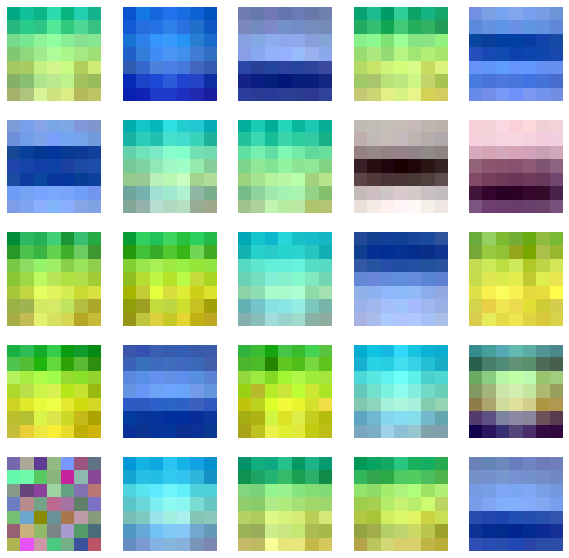

In [63]:
plot_weights(accel_net5.layers[0].wts.transpose(0, 2, 3, 1), saveFig=False, filename='convWts_adam_train_20epoch.png')

In [64]:
an_loss6 = None
an_train_acc6 = None
an_val_acc6 = None

accel_net6 = ConvNet4Accel(input_shape = (3,32,32), wt_scale = 0.001)
accel_net6.compile('adam', lr = 0.0001)

an_loss6, an_train_acc6, an_val_acc6 = accel_net6.fit(x_train, y_train,x_val, y_val,mini_batch_sz=25, n_epochs=100, acc_freq=100)

Starting to train...
18100 iterations. 181 iter/epoch.
Time taken for iteration 0:  0.002083305517832438
  Train acc: 0.142, Val acc: 0.5
  Train acc: 0.158, Val acc: 0.0
  Train acc: 0.182, Val acc: 0.0
  Train acc: 0.222, Val acc: 0.5
  Train acc: 0.212, Val acc: 0.5
  Train acc: 0.228, Val acc: 0.5
  Train acc: 0.278, Val acc: 0.5
  Train acc: 0.24, Val acc: 0.0
  Train acc: 0.272, Val acc: 0.5
  Train acc: 0.266, Val acc: 0.0
  Train acc: 0.286, Val acc: 0.0
  Train acc: 0.286, Val acc: 0.0
  Train acc: 0.286, Val acc: 0.0
  Train acc: 0.278, Val acc: 0.0
  Train acc: 0.306, Val acc: 0.0
  Train acc: 0.288, Val acc: 0.0
  Train acc: 0.322, Val acc: 0.0
  Train acc: 0.354, Val acc: 0.0
  Train acc: 0.338, Val acc: 0.0
  Train acc: 0.36, Val acc: 0.0
  Train acc: 0.388, Val acc: 0.0
  Train acc: 0.372, Val acc: 0.0
  Train acc: 0.326, Val acc: 0.0
  Train acc: 0.322, Val acc: 0.0
  Train acc: 0.352, Val acc: 0.0
  Train acc: 0.37, Val acc: 0.0
  Train acc: 0.35, Val acc: 0.0
  Train 

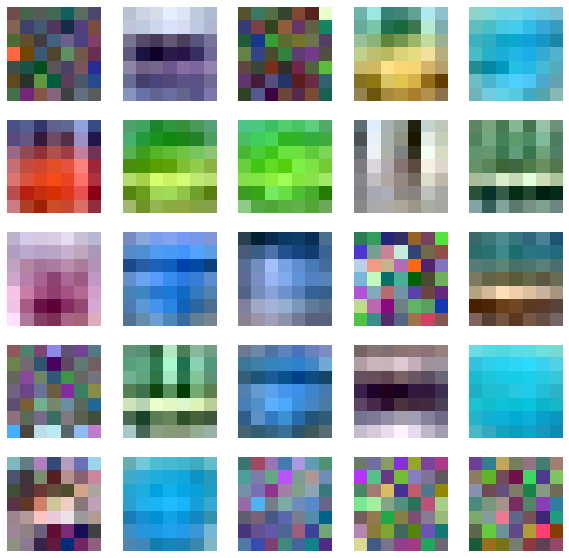

In [67]:
plot_weights(accel_net6.layers[0].wts.transpose(0, 2, 3, 1), saveFig=False, filename='convWts_adam_train_20epoch.png')

In [66]:
an_loss6 = None
an_train_acc6 = None
an_val_acc6 = None

accel_net6 = ConvNet4Accel(input_shape = (3,32,32), wt_scale = 0.001, reg = 0.0001)
accel_net6.compile('adam', lr = 0.0005)

an_loss6, an_train_acc6, an_val_acc6 = accel_net6.fit(x_train, y_train,x_val, y_val,mini_batch_sz=10, n_epochs=100, acc_freq=100)

Starting to train...
45400 iterations. 454 iter/epoch.
Time taken for iteration 0:  0.0012261271476745605
  Train acc: 0.14, Val acc: 0.5
  Train acc: 0.19, Val acc: 0.5
  Train acc: 0.2, Val acc: 0.5
  Train acc: 0.238, Val acc: 0.0
  Train acc: 0.288, Val acc: 0.0
  Train acc: 0.298, Val acc: 0.0
  Train acc: 0.334, Val acc: 0.0
  Train acc: 0.348, Val acc: 0.0
  Train acc: 0.348, Val acc: 0.0
  Train acc: 0.332, Val acc: 0.0
  Train acc: 0.346, Val acc: 0.0
  Train acc: 0.384, Val acc: 0.0
  Train acc: 0.374, Val acc: 0.0
  Train acc: 0.384, Val acc: 0.0
  Train acc: 0.396, Val acc: 0.5
  Train acc: 0.398, Val acc: 0.0
  Train acc: 0.42, Val acc: 0.0
  Train acc: 0.384, Val acc: 0.0
  Train acc: 0.446, Val acc: 0.0
  Train acc: 0.404, Val acc: 0.0
  Train acc: 0.434, Val acc: 0.0
  Train acc: 0.414, Val acc: 0.0
  Train acc: 0.43, Val acc: 0.5
  Train acc: 0.464, Val acc: 0.0
  Train acc: 0.48, Val acc: 0.5
  Train acc: 0.482, Val acc: 0.5
  Train acc: 0.502, Val acc: 0.5
  Train ac

KeyboardInterrupt: 

In [ ]:
an_loss7 = None
an_train_acc7 = None
an_val_acc7 = None

accel_net7 = ConvNet4Accel(input_shape = (3,32,32), wt_scale = 0.001, reg = 0.0001)
accel_net7.compile('adam', lr = 0.005)

an_loss6, an_train_acc6, an_val_acc6 = accel_net7.fit(x_train, y_train,x_val, y_val,mini_batch_sz=10, n_epochs=100, acc_freq=100)

Starting to train...
45400 iterations. 454 iter/epoch.
Time taken for iteration 0:  0.0011707305908203124
  Train acc: 0.166, Val acc: 0.0
  Train acc: 0.174, Val acc: 0.0
  Train acc: 0.162, Val acc: 0.0
  Train acc: 0.186, Val acc: 0.0
  Train acc: 0.248, Val acc: 0.0
  Train acc: 0.222, Val acc: 0.0
  Train acc: 0.28, Val acc: 0.0
  Train acc: 0.256, Val acc: 0.0
  Train acc: 0.28, Val acc: 0.0
  Train acc: 0.272, Val acc: 0.0
  Train acc: 0.318, Val acc: 0.0
  Train acc: 0.294, Val acc: 0.0
  Train acc: 0.296, Val acc: 0.5
  Train acc: 0.346, Val acc: 0.0
  Train acc: 0.324, Val acc: 0.0
  Train acc: 0.336, Val acc: 0.0
  Train acc: 0.312, Val acc: 0.0
  Train acc: 0.362, Val acc: 0.0
  Train acc: 0.352, Val acc: 0.5
  Train acc: 0.346, Val acc: 0.0
  Train acc: 0.352, Val acc: 0.0
  Train acc: 0.328, Val acc: 0.0
  Train acc: 0.318, Val acc: 0.5
  Train acc: 0.318, Val acc: 0.0
  Train acc: 0.366, Val acc: 0.5
  Train acc: 0.368, Val acc: 0.0
  Train acc: 0.3, Val acc: 0.5
  Train

### 7f) Visualize layer weights

Run the following code and submit the inline image of the weight visualization of the 1st layer (convolutional layer) of the network.

**Note:**
- Setting optional parameter to `True` will let you save a .PNG file in your project folder of your weights. I'd suggest setting it to `False` unless look at your weights and they look like they are worth saving. You don't want a training run that produces undesirable weights to overwrite your good looking results!

In [20]:
def plot_weights(wts, saveFig=True, filename='convWts_adam_overfit.png'):
    grid_sz = int(np.sqrt(len(wts)))
    plt.figure(figsize=(10,10))
    for x in range(grid_sz):
        for y in range(grid_sz):
            lin_ind = np.ravel_multi_index((x, y), dims=(grid_sz, grid_sz))
            plt.subplot(grid_sz, grid_sz, lin_ind+1)
            currImg = wts[lin_ind]
            low, high = np.min(currImg), np.max(currImg)
            currImg = 255*(currImg - low) / (high - low)
            currImg = currImg.astype('uint8')
            plt.imshow(currImg)
            plt.gca().axis('off')
    if saveFig:
        plt.savefig('convWts_adam_overfit.png')
    plt.show()

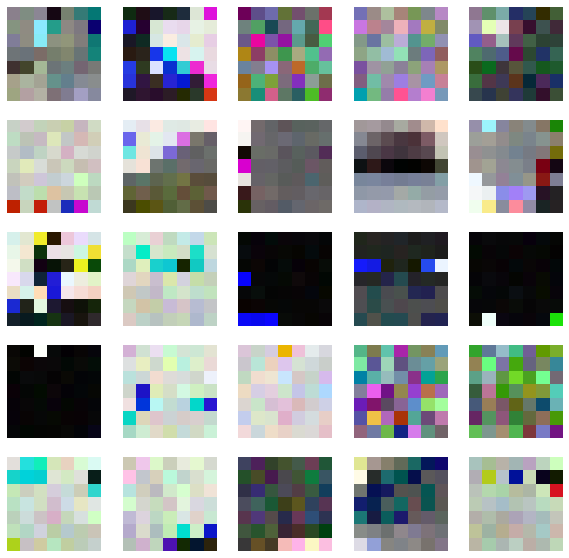

In [21]:
# Subsitute your trained network below
# netT is my network's name
# You shouldn't see RGB noise
plot_weights(accel_net2.layers[0].wts.transpose(0, 2, 3, 1), saveFig=False, filename='convWts_adam_train_20epoch.png')

**Question 6:** What do the learned filters look like? Does this make sense to you / is this what you expected? In which area of the brain do these filters resemble cell receptive fields?

Note: you should not see RGB "noise". If you do, and you pass the "overfit" test with the Adam optimizer, you probably need to increase the number of training epochs.

## Extensions

**General advice:** When making modifications for extensions, make small changes, then check to make sure you pass test code. Also, test out the network runtime on small examples before/after the changes. If you're not careful, the simulation time can become intractable really quickly!

**Remember:** One thorough extension usually is worth more than several "shallow" extensions.

### 0. Pedal to the metal: achieve high accuracy on STL-10

You can achieve higher (>50%) classification accuracy on the STL-10 test set. Find the hyperparameters to achieve this.

### 1. Experiment with different network architectures.

The design of the `Network` class is modular. As long as you're careful about shapes, adding/removing network layers (e.g. `Conv2D`, `Dense`, etc.) should be straight forward. Experiment with adding another sequence of `Conv2D` and `MaxPooling2D` layers. Add another `Dense` hidden layer before the output layer. How do the changes affect classification accuracy and loss? 

### 2. Experiment with different network hyperparameters.

Explore the affect one or more change below has on classification. Be careful about how the hyperparameters may affect the shape of network layers. Thorough analysis will get you more points (not try a few ad hoc values).

- Experiment with different numbers of hidden units in the Dense layers.
- Experiment different max pooling window sizes and strides.
- Experiment with kernel sizes (not 7x7). Can you get away with smaller ones? Do they perform just as well? What is the change in runtime like? What is the impact on their visualized appearance?
- Experiment with number of kernels in the convolutional layer. Is more/fewer better? What is the impact on their visualized appearance?

###  3. Add and test some training bells and whistles

Add features like early stopping, learning rate decay (learning rate at the end of an epoch becomes some fraction of its former value), etc and assess how they affect training loss convergence and accuracy. 

### 4. Additional optimizers

Research other optimizers used in backpropogation and implement one or more of them within the model structure. Compare its performance to ones you have implemented

### 5. Optimize your algorithms

Find the main performance bottlenecks in the network and improve your code to reduce runtime (e.g. reduce explicit for loops, increase vectorization, etc). Research faster algorithms to do operations like convolution and implement them. Given the complexity of the network, I suggest focusing on one area at a time and make sure everything you change passes the test code before proceeding. Quantify and discuss your performance improvements

### 6. Additional loss functions

Implement support for sigmoid, or another activation functions and associated losses. Test it out and compare with softmax/cross entropy. Make sure any necessary changes to the layer's gradient are made.

### 7. Additional datasets

Do classification and analyxe the results with an image dataset of your choice.

### 8. Performance analysis

Do a thorough comparative analysis of the non-accelerated network and accelerated networks with respect to runtime.